---
---
# [PyTorch](https://pytorch.org/) </br>

<img src= 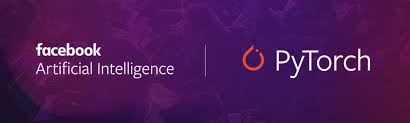>

---



---




# **PyTorch** Intro and <font color= magentea>Autograd</font> <font color=#ff80ff>(**Automatic Differentiation**</font>)
---

---
---
## <font size=5>MACHINE LEARNING LAB (MLLB)</font>
### ETSIT-UPM MUIT & MUTSC

---
---

## A condensation of:
* PyTorch Tutorial 02 - Tensor Basics
https://www.youtube.com/watch?v=exaWOE8jvy8
* PyTorch Tutorial 03 - Gradient Calculation With Autograd https://www.youtube.com/watch?v=DbeIqrwb_dE
* PyTorch Tutorial 04 - Backpropagation - Theory With Example https://www.youtube.com/watch?v=3Kb0QS6z7WA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=4
* PyTorch Tutorial 05 - Gradient Descent with Autograd and Backpropagation https://www.youtube.com/watch?v=E-I2DNVzQLg
* PyTorch Tutorial 06 - Training Pipeline: Model, Loss, and Optimizer https://www.youtube.com/watch?v=VVDHU_TWwUg&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=6


In [1]:
import torch

In [2]:
print(torch.__version__)

1.12.1+cu113


## **PyTorch Tutorial 02 - Tensor Basics** https://www.youtube.com/watch?v=exaWOE8jvy8

In [3]:
x = torch.tensor([1,2,3])
print(x)

tensor([1, 2, 3])


In [4]:
x = torch.rand(4,2,3)
print(x)

tensor([[[0.9800, 0.6618, 0.0185],
         [0.2479, 0.5197, 0.3052]],

        [[0.8263, 0.0739, 0.9918],
         [0.1657, 0.6569, 0.8266]],

        [[0.5536, 0.6012, 0.6259],
         [0.7833, 0.3580, 0.4834]],

        [[0.4868, 0.6802, 0.5830],
         [0.5643, 0.4304, 0.6004]]])


In [5]:
x.shape

torch.Size([4, 2, 3])

* # Combination with Numpy

In [6]:
import numpy as np

a = np.ones(5)
print(a)

b = torch.from_numpy(a)
print(b)

a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


---
---

# **PyTorch Tutorial 04** - Backpropagation - Theory With Example

https://www.youtube.com/watch?v=3Kb0QS6z7WA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=4

# **PyTorch Tutorial 05** - Gradient Descent with Autograd and Backpropagation

---
---

# Operations create a **COMPUTATIONAL GRAPH**

- ## Example: a simple linear regression

<img src = 'https://drive.google.com/uc?id=1Isslg5y3HmXxUROCPLSL_8EVyRcNcMcb' />



* # In the example:
> * ## $x$ and $y$ are inputs
> * ## $w$ is the weigth to be trained: using backpropagation and Stochastic Gradient Descent (SGD)






## PyTorch Tutorial 05 - Gradient Descent with Autograd and Backpropagation

Text(0.5, 1.0, 'Simple Regression (Training Data)')

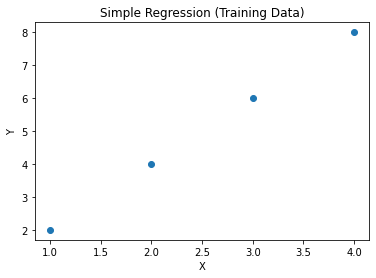

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Linear Regression
# f = 2 * x
# CREATE SOME Training data
X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Regression (Training Data)')

- ### PyTorch Autograd provides the gradients "automatically"


1.   Note that $w$ tensor **requires_grad=True**

2.   **update weights** are NOT in the Computational Graph

3.   In every epoch **w.grad.zero_()** to avoid gradients accumulation



In [8]:
# Using PyTorch
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# gradient: specific calculation is NOT NEEDED as PyTorch provides it !!!
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x-y)



In [9]:
 y_pred = forward(X)
 print('Foward predicted values: ', y_pred)
 print('Initial w: ', w)

Foward predicted values:  tensor([0., 0., 0., 0.], grad_fn=<MulBackward0>)
Initial w:  tensor(0., requires_grad=True)


In [10]:
 l = loss(Y, y_pred)

 print('Loss: ', l)

Loss:  tensor(30., grad_fn=<MeanBackward0>)


In [11]:
# INSTEAD OF calculating gradients: w_grad = gradient(X,Y,y_pred)

# PyTorch provide them:
# Autograd provides the gradients "automatically"

l.backward() # dl/dw

with torch.no_grad():   # THIS is because we don't want this to be part of the computational graph
  print('Gradient: ', w.grad)


Gradient:  tensor(-30.)


In [12]:
learning_rate = 0.01

print('Initial weight: ', w)

# update weights
with torch.no_grad():   # THIS is because we don't want this to be part of the computational graph
    w -= learning_rate * w.grad


print('Updated weight: ', w)

# zero gradients: to avoid gradients accumulation!!!
w.grad.zero_()

Initial weight:  tensor(0., requires_grad=True)
Updated weight:  tensor(0.3000, requires_grad=True)


tensor(0.)

In [13]:
# Training using PyTorch
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

learning_rate = 0.01
n_iters =20

for epoch in range(n_iters):
  # prediction (forward)
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  #dw = gradient(X,Y,y_pred)
  l.backward() # dl/dw

  # update weights
  with torch.no_grad():   # THIS is because we don't want this to be part of the computational graph
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()


  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training fro x = 5: f(5) = {forward(5):.3f}')


epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
Prediction after training fro x = 5: f(5) = 9.612


## PyTorch Tutorial 06 - Training Pipeline: Model, Loss, and Optimizer

https://www.youtube.com/watch?v=VVDHU_TWwUg&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=6

## Training PIPELINE

* 1) Design model (input, output size, forward pass)
* 2) Construct loss and optimizer
* 3) Training loop:

  - forward pass: compute prediction
  - backward pass: gradients
  - update weights

# ... and using torch.nn to define the model


* # PyTorch Training PIPELINE

In [14]:
import torch.nn as nn

# We must separate each individual training data
X = torch.tensor([[1],[2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([[5]], dtype = torch.float32)

n_input_samples, n_input_features = X.shape
n_output_samples, n_output_features = Y.shape

input_size =  n_input_features
output_size = n_output_features

print('input_size:', input_size, 'output_size:' ,\
      output_size, 'n_input_samples: ', n_input_samples, \
      'n_output_samples: ', n_output_samples)

input_size: 1 output_size: 1 n_input_samples:  4 n_output_samples:  4


* ### The <font color=yellow>torch.nn</font> namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. 

> #### nn.Linear() Applies a linear transformation to the incoming data: y=x*w+b

In [15]:
# Define a linear regression model
model = nn.Linear(input_size, output_size)

# loss = MSE
loss = nn.MSELoss()

print(f'Prediction before training for X_test (only ONE value):  {model(X_test).item():.3f}')

Prediction before training for X_test (only ONE value):  4.379


In [16]:
# PyTorch Training PIPELINE

learning_rate = 0.01
n_iters =200

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction (forward)
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward()

  # Optimizer to update weights
  optimizer.step()

  # zero gradients (avoid gradients accumulation)
  optimizer.zero_grad()


  if epoch % 10 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, b = {b.item():.3f}, loss = {l:.8f}')

print(f'\nFor X_test = {X_test.item():.3f}, the prediction is =  {model(X_test).item():.3f}')


epoch 1: w = 0.858, b = 0.895, loss = 7.78769159
epoch 11: w = 1.500, b = 1.075, loss = 0.40510470
epoch 21: w = 1.612, b = 1.077, loss = 0.20224786
epoch 31: w = 1.639, b = 1.050, loss = 0.18583770
epoch 41: w = 1.652, b = 1.020, loss = 0.17490098
epoch 51: w = 1.663, b = 0.990, loss = 0.16471754
epoch 61: w = 1.673, b = 0.961, loss = 0.15513012
epoch 71: w = 1.683, b = 0.933, loss = 0.14610073
epoch 81: w = 1.692, b = 0.905, loss = 0.13759692
epoch 91: w = 1.701, b = 0.878, loss = 0.12958813
epoch 101: w = 1.710, b = 0.852, loss = 0.12204538
epoch 111: w = 1.719, b = 0.827, loss = 0.11494168
epoch 121: w = 1.727, b = 0.803, loss = 0.10825150
epoch 131: w = 1.735, b = 0.779, loss = 0.10195073
epoch 141: w = 1.743, b = 0.756, loss = 0.09601671
epoch 151: w = 1.750, b = 0.734, loss = 0.09042801
epoch 161: w = 1.758, b = 0.712, loss = 0.08516461
epoch 171: w = 1.765, b = 0.691, loss = 0.08020768
epoch 181: w = 1.772, b = 0.671, loss = 0.07553908
epoch 191: w = 1.779, b = 0.651, loss = 0.